In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.charts import Bar,Line,HeatMap,Map,Page,Pie
from apyori import apriori
import statsmodels.api as sm
from scipy import stats
import tkinter as tk
from tkinter import messagebox

In [2]:
#分别导入两张sheet的数据并浏览变量信息
df1 = pd.read_excel(r"日化.xlsx",sheet_name = '销售订单表')
df2 = pd.read_excel(r"日化.xlsx",sheet_name = '商品信息表')

In [3]:
print(df1.info())
print(df1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31451 entries, 0 to 31450
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单编码    31451 non-null  object        
 1   订单日期    31451 non-null  datetime64[ns]
 2   客户编码    31451 non-null  object        
 3   所在区域    31449 non-null  object        
 4   所在省份    31449 non-null  object        
 5   所在地市    31451 non-null  object        
 6   商品编号    31450 non-null  object        
 7   订购数量    31449 non-null  object        
 8   订购单价    31447 non-null  object        
 9   金额      31447 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 2.4+ MB
None
     订单编码       订单日期    客户编码 所在区域 所在省份      所在地市  商品编号  订购数量 订购单价        金额
0  D31313 2019-05-16  S22796   东区  浙江省       台州市  X091   892  214  190888.0
1  D21329 2019-05-14  S11460   东区  安徽省       宿州市  X005   276  185   51060.0
2  D22372 2019-08-26  S11101   北区  山西省       忻州市  X078  145

In [4]:
print(df2.info())
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   商品编号    122 non-null    object
 1   商品名称    122 non-null    object
 2   商品小类    122 non-null    object
 3   商品大类    122 non-null    object
 4   销售单价    122 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 4.9+ KB
None
   商品编号 商品名称 商品小类 商品大类  销售单价
0  X001  商品1   面膜  护肤品   121
1  X002  商品2   面膜  护肤品   141
2  X003  商品3   面膜  护肤品   168
3  X004  商品4   面膜  护肤品   211
4  X005  商品5   面膜  护肤品   185


In [5]:
#可以看到两张表都存在缺失值，我们先merge两张表
dfm = pd.merge(left = df1,right = df2, on = '商品编号')
dfm.tail(20)   #浏览数据集的后20项数据

,订单编码,订单日期,客户编码,所在区域,所在省份,所在地市,商品编号,订购数量,订购单价,金额,商品名称,商品小类,商品大类,销售单价
31429,D24577,2019-04-13,S15155,西区,贵州省,黔南州,X115,954,136,129744.0,商品115,睫毛膏,彩妆,136
31430,D29297,2019-03-08,S15515,东区,上海市,上海市,X115,1031,136,140216.0,商品115,睫毛膏,彩妆,136
31431,D33359,2019-01-03,S12814,南区,广东省,梅州市,X115,1496,136,203456.0,商品115,睫毛膏,彩妆,136
31432,D27764,2019-07-28,S17606,北区,北京市,北京市,X115,1662,136,226032.0,商品115,睫毛膏,彩妆,136
31433,D22736,2019-09-13,S15631,南区,江西省,南昌市,X115,689,136,93704.0,商品115,睫毛膏,彩妆,136
31434,D28887,2019-06-08,S10972,南区,福建省,泉州市,X109,323,180,58140.0,商品109,睫毛膏,彩妆,180
31435,D28099,2019-05-18,S12347,西区,陕西省,宝鸡市,X109,1438,180,258840.0,商品109,睫毛膏,彩妆,180
31436,D29990,2019-05-17,S15600,南区,广东省,广州市,X109,940,180,169200.0,商品109,睫毛膏,彩妆,180
31437,D31987,2019-01-17,S14376,西区,新疆维吾尔自治区,哈密地区,X109,1042,180,187560.0,商品109,睫毛膏,彩妆,180
31438,D26169,2019-09-22,S17833,南区,广东省,中山市,X109,1012,180,182160.0,商品109,睫毛膏,彩妆,180


In [6]:
#浏览dfm的基本信息
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31449 entries, 0 to 31448
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单编码    31449 non-null  object        
 1   订单日期    31449 non-null  datetime64[ns]
 2   客户编码    31449 non-null  object        
 3   所在区域    31447 non-null  object        
 4   所在省份    31447 non-null  object        
 5   所在地市    31449 non-null  object        
 6   商品编号    31449 non-null  object        
 7   订购数量    31448 non-null  object        
 8   订购单价    31446 non-null  object        
 9   金额      31446 non-null  float64       
 10  商品名称    31449 non-null  object        
 11  商品小类    31449 non-null  object        
 12  商品大类    31449 non-null  object        
 13  销售单价    31449 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 3.4+ MB


In [7]:
dfm['month'] = dfm['订单日期'].dt.to_period('M').dt.to_timestamp()  #得到精确到月的时间格式数据新列
dfm

,订单编码,订单日期,客户编码,所在区域,所在省份,所在地市,商品编号,订购数量,订购单价,金额,商品名称,商品小类,商品大类,销售单价,month
0,D31313,2019-05-16,S22796,东区,浙江省,台州市,X091,892,214,190888.0,商品91,粉底,彩妆,214,2019-05-01
1,D26674,2019-05-01,S15128,东区,江苏省,南通市,X091,1133,214,242462.0,商品91,粉底,彩妆,214,2019-05-01
2,D23381,2019-09-22,S17133,东区,江苏省,宿迁市,X091,1136,214,243104.0,商品91,粉底,彩妆,214,2019-09-01
3,D29060,2019-09-10,S14106,东区,江苏省,常州市,X091,544,214,116416.0,商品91,粉底,彩妆,214,2019-09-01
4,D21234,2019-07-03,S17197,东区,湖北省,十堰市,X091,342,214,73188.0,商品91,粉底,彩妆,214,2019-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31444,D30482,2019-06-05,S11033,东区,浙江省,金华市,X118,551,238,131138.0,商品118,蜜粉,彩妆,238,2019-06-01
31445,D29542,2019-05-01,S12446,东区,江苏省,南通市,X118,165,238,39270.0,商品118,蜜粉,彩妆,238,2019-05-01
31446,D24798,2019-06-26,S16170,南区,福建省,泉州市,X118,62,238,14756.0,商品118,蜜粉,彩妆,238,2019-06-01
31447,D31831,2019-08-13,S22214,北区,黑龙江省,佳木斯市,X118,795,238,189210.0,商品118,蜜粉,彩妆,238,2019-08-01


In [8]:
dfm.info()  #数据处理完毕后的数据信息概览

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31449 entries, 0 to 31448
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单编码    31449 non-null  object        
 1   订单日期    31449 non-null  datetime64[ns]
 2   客户编码    31449 non-null  object        
 3   所在区域    31447 non-null  object        
 4   所在省份    31447 non-null  object        
 5   所在地市    31449 non-null  object        
 6   商品编号    31449 non-null  object        
 7   订购数量    31448 non-null  object        
 8   订购单价    31446 non-null  object        
 9   金额      31446 non-null  float64       
 10  商品名称    31449 non-null  object        
 11  商品小类    31449 non-null  object        
 12  商品大类    31449 non-null  object        
 13  销售单价    31449 non-null  int64         
 14  month   31449 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(11)
memory usage: 3.6+ MB


# 数据清洗

#### 对生成的数据集进行缺失值、异常值、重复值处理以及数据规整处理。

#### 1.缺失值处理

In [9]:
#由于通过dfm.info()我们可以知道一共有31449条数据，其中“所在区域”，“所在省份”，“订购数量”，“订购单价”，“金额”出现了缺失值，缺失值数量较少。
#在处理之前可以先找到具体的缺失数据。
#先处理“订购数量”，“订购单价”，“金额”三列

In [10]:
dfdrop = dfm[dfm['金额'].isnull() & dfm['订购单价'].isnull()]
print(dfdrop)
dfm.drop(index = dfdrop.index,inplace = True)
dfm.info()

         订单编码       订单日期    客户编码 所在区域 所在省份 所在地市  商品编号  订购数量 订购单价  金额  商品名称  \
2780   D22086 2019-09-11  S22887   南区  江西省  九江市  X011  1698  NaN NaN  商品11   
5446   D31856 2019-07-12  S17476   东区  湖北省  武汉市  X019   NaN  NaN NaN  商品19   
30825  D23111 2019-04-22  S10909   东区  浙江省  温州市  X096   804  NaN NaN  商品96   

      商品小类 商品大类  销售单价      month  
2780    面膜  护肤品   226 2019-09-01  
5446    眼霜  护肤品   210 2019-07-01  
30825   眼影   彩妆   222 2019-04-01  
<class 'pandas.core.frame.DataFrame'>
Index: 31446 entries, 0 to 31448
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单编码    31446 non-null  object        
 1   订单日期    31446 non-null  datetime64[ns]
 2   客户编码    31446 non-null  object        
 3   所在区域    31444 non-null  object        
 4   所在省份    31444 non-null  object        
 5   所在地市    31446 non-null  object        
 6   商品编号    31446 non-null  object        
 7   订购数量    31446 non-null  object        
 8 

In [11]:
dfm[dfm['所在区域'].isnull() & dfm['所在省份'].isnull()]  #不存在两个信息同时缺失的数据信息

,订单编码,订单日期,客户编码,所在区域,所在省份,所在地市,商品编号,订购数量,订购单价,金额,商品名称,商品小类,商品大类,销售单价,month


In [12]:
dfbuqi1 = dfm[dfm['所在区域'].isnull()]
dfm[dfm['所在区域'].isnull()]  #根据省份和地市情况可以补齐

,订单编码,订单日期,客户编码,所在区域,所在省份,所在地市,商品编号,订购数量,订购单价,金额,商品名称,商品小类,商品大类,销售单价,month
6028,D26806,2019-02-23,S16365,NaN,广东省,湛江市,X022,1542,158,243636.0,商品22,眼霜,护肤品,158,2019-02-01
23987,D25844,2019-02-27,S14821,NaN,江苏省,扬州市,X045,538,205,110290.0,商品45,洁面乳,护肤品,205,2019-02-01


In [13]:
dfbuqi2 = dfm[dfm['所在省份'].isnull()]
dfm[dfm['所在省份'].isnull()]   #根据地市可以补齐

,订单编码,订单日期,客户编码,所在区域,所在省份,所在地市,商品编号,订购数量,订购单价,金额,商品名称,商品小类,商品大类,销售单价,month
6029,D26028,2019-07-13,S15878,北区,NaN,北京市,X022,1317,158,208086.0,商品22,眼霜,护肤品,158,2019-07-01
24755,D22734,2019-02-23,S12453,南区,NaN,广州市,X103,1067,202,215534.0,商品103,睫毛膏,彩妆,202,2019-02-01


In [14]:
dfm.loc[dfbuqi1.index,'所在区域'] = pd.Series(['南区','南区'],index = dfbuqi1.index)
dfm.loc[dfbuqi2.index,'所在省份'] = pd.Series(['北京市','广东省'],index = dfbuqi2.index)
#补齐后看一下效果
print(dfm.loc[dfbuqi1.index])
print(dfm.loc[dfbuqi2.index])

         订单编码       订单日期    客户编码 所在区域 所在省份 所在地市  商品编号  订购数量 订购单价        金额  \
6028   D26806 2019-02-23  S16365   南区  广东省  湛江市  X022  1542  158  243636.0   
23987  D25844 2019-02-27  S14821   南区  江苏省  扬州市  X045   538  205  110290.0   

       商品名称 商品小类 商品大类  销售单价      month  
6028   商品22   眼霜  护肤品   158 2019-02-01  
23987  商品45  洁面乳  护肤品   205 2019-02-01  
         订单编码       订单日期    客户编码 所在区域 所在省份 所在地市  商品编号  订购数量 订购单价        金额  \
6029   D26028 2019-07-13  S15878   北区  北京市  北京市  X022  1317  158  208086.0   
24755  D22734 2019-02-23  S12453   南区  广东省  广州市  X103  1067  202  215534.0   

        商品名称 商品小类 商品大类  销售单价      month  
6029    商品22   眼霜  护肤品   158 2019-07-01  
24755  商品103  睫毛膏   彩妆   202 2019-02-01  


In [15]:
dfm.info()  #所以缺失值已经处理完毕

<class 'pandas.core.frame.DataFrame'>
Index: 31446 entries, 0 to 31448
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单编码    31446 non-null  object        
 1   订单日期    31446 non-null  datetime64[ns]
 2   客户编码    31446 non-null  object        
 3   所在区域    31446 non-null  object        
 4   所在省份    31446 non-null  object        
 5   所在地市    31446 non-null  object        
 6   商品编号    31446 non-null  object        
 7   订购数量    31446 non-null  object        
 8   订购单价    31446 non-null  object        
 9   金额      31446 non-null  float64       
 10  商品名称    31446 non-null  object        
 11  商品小类    31446 non-null  object        
 12  商品大类    31446 non-null  object        
 13  销售单价    31446 non-null  int64         
 14  month   31446 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(11)
memory usage: 4.8+ MB


#### 2.异常值处理

In [16]:
#### 主要针对数字类进行异常值处理，在处理前我们看到本该为int/float类型的数据列'订购单价'和'订购数量'为str类型，所以可以转化一下数据类型

In [17]:
def change(x):
    s = ''
    for i in str(x):
        if i.isdigit():
            s+=i
    return s

In [18]:
dfm['订购单价'].value_counts()  #发现了一个xx元

订购单价
212    1229
102     988
86      945
235     902
226     873
       ... 
96       10
136       9
147       7
238       5
86元       1
Name: count, Length: 91, dtype: int64

In [19]:
dfm['订购数量'].value_counts()

订购数量
797     36
773     36
954     36
793     35
734     35
        ..
1810     1
2450     1
2733     1
2298     1
3210     1
Name: count, Length: 2329, dtype: int64

In [20]:
dfm['订购数量'] = dfm['订购数量'].apply(change).astype(float)
dfm['订购单价'] = dfm['订购单价'].apply(change).astype(float)

In [21]:
dfm.info()   #成功转化数据类型

<class 'pandas.core.frame.DataFrame'>
Index: 31446 entries, 0 to 31448
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单编码    31446 non-null  object        
 1   订单日期    31446 non-null  datetime64[ns]
 2   客户编码    31446 non-null  object        
 3   所在区域    31446 non-null  object        
 4   所在省份    31446 non-null  object        
 5   所在地市    31446 non-null  object        
 6   商品编号    31446 non-null  object        
 7   订购数量    31446 non-null  float64       
 8   订购单价    31446 non-null  float64       
 9   金额      31446 non-null  float64       
 10  商品名称    31446 non-null  object        
 11  商品小类    31446 non-null  object        
 12  商品大类    31446 non-null  object        
 13  销售单价    31446 non-null  int64         
 14  month   31446 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(9)
memory usage: 4.8+ MB


In [22]:
#运用describe对于数值型数据进行描述性统计
#通过结果可以看出数据处于正常，没有不合常理的数据
dfm.describe()

,订单日期,订购数量,订购单价,金额,销售单价,month
count,31446,31446.000000,31446.000000,31446.000000,31446.000000,31446
mean,2019-05-30 10:43:01.339438848,885.006201,160.282961,141651.514819,160.282961,2019-05-15 14:57:10.337721600
min,2019-01-01 00:00:00,7.000000,56.000000,392.000000,56.000000,2019-01-01 00:00:00
25%,2019-04-03 00:00:00,504.000000,102.000000,64961.250000,102.000000,2019-04-01 00:00:00
50%,2019-06-05 00:00:00,859.000000,159.000000,120785.000000,159.000000,2019-06-01 00:00:00
75%,2019-07-31 00:00:00,1219.000000,213.000000,198940.000000,213.000000,2019-07-01 00:00:00
max,2019-09-30 00:00:00,3210.000000,253.000000,779285.000000,253.000000,2019-09-01 00:00:00
std,NaN,495.978955,59.981424,99629.189249,59.981424,NaN


#### 3.数据规整

In [23]:
#### 我们上面已经处理了数值型数据的异常值，对于非数值型数据，我们主要检查是否存在同类不同名的情况存在，即‘北京’和‘北京市’的情况
print(dfm['订单编码'].value_counts())   #无误
print(dfm['客户编码'].value_counts())   #出现了一个错误格式'编号S13676'
print(dfm['所在区域'].value_counts())   #根据结果，看到‘西 区’ 和‘男区’
print(dfm['所在省份'].value_counts())   #无误
print(dfm['所在地市'].value_counts())   #无误
print(dfm['商品名称'].value_counts())   #无误
print(dfm['商品小类'].value_counts())   #无误
print(dfm['商品大类'].value_counts())   #无误

订单编码
D22779    12
D21596    12
D23529    12
D24360    11
D28219    11
          ..
D31669     1
D33170     1
D28742     1
D34188     1
D33684     1
Name: count, Length: 9063, dtype: int64
客户编码
S21325      82
S19095      81
S22773      80
S18003      79
S11581      79
            ..
S15935       4
S18379       4
S22287       3
S21193       3
编号S13676     1
Name: count, Length: 1084, dtype: int64
所在区域
东区     11231
南区      8864
北区      6174
西区      4043
西 区     1133
男区         1
Name: count, dtype: int64
所在省份
江苏省         4732
广东省         3348
浙江省         2645
福建省         1760
四川省         1525
安徽省         1519
湖南省         1484
山东省         1424
上海市         1276
江西省         1077
湖北省         1060
河北省         1046
广西壮族自治区     1041
重庆市          894
云南省          801
陕西省          726
河南省          640
北京市          624
辽宁省          616
山西省          575
贵州省          553
黑龙江省         543
吉林省          380
甘肃省          334
新疆维吾尔自治区     227
天津市          186
海南省          154
内蒙古自治区       140
宁夏回族自治区     

In [24]:
dfm['订单编码'] = dfm['订单编码'].str.replace('订单号','')


In [25]:
dfm['客户编码'] = dfm['客户编码'].str.replace('编号','')
dfm['客户编码'].value_counts()  #修正完成

客户编码
S21325    82
S19095    81
S22773    80
S18003    79
S11581    79
          ..
S15958     5
S18379     4
S15935     4
S21193     3
S22287     3
Name: count, Length: 1083, dtype: int64

In [26]:
#修改‘所在区域’列的数据格式
dfm['所在区域'] = dfm['所在区域'].str.replace(' ','')
dfm['所在区域'] = dfm['所在区域'].str.replace('男','南')
dfm['所在区域'].value_counts()  #修正完成

所在区域
东区    11231
南区     8865
北区     6174
西区     5176
Name: count, dtype: int64

#### 4.去除重复值

In [27]:
dfm = dfm.drop_duplicates()
dfm.info()   #去重前为31441行数据，说明重复了6列数据

<class 'pandas.core.frame.DataFrame'>
Index: 31440 entries, 0 to 31448
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单编码    31440 non-null  object        
 1   订单日期    31440 non-null  datetime64[ns]
 2   客户编码    31440 non-null  object        
 3   所在区域    31440 non-null  object        
 4   所在省份    31440 non-null  object        
 5   所在地市    31440 non-null  object        
 6   商品编号    31440 non-null  object        
 7   订购数量    31440 non-null  float64       
 8   订购单价    31440 non-null  float64       
 9   金额      31440 non-null  float64       
 10  商品名称    31440 non-null  object        
 11  商品小类    31440 non-null  object        
 12  商品大类    31440 non-null  object        
 13  销售单价    31440 non-null  int64         
 14  month   31440 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(9)
memory usage: 3.8+ MB


# 数据分析

#### 用户角度

In [28]:
#a.用户整体消费趋势分析

In [29]:
plt.rcParams['font.sans-serif'] = ['SimHei']

Text(0.5, 1.0, '每月的购买人数')

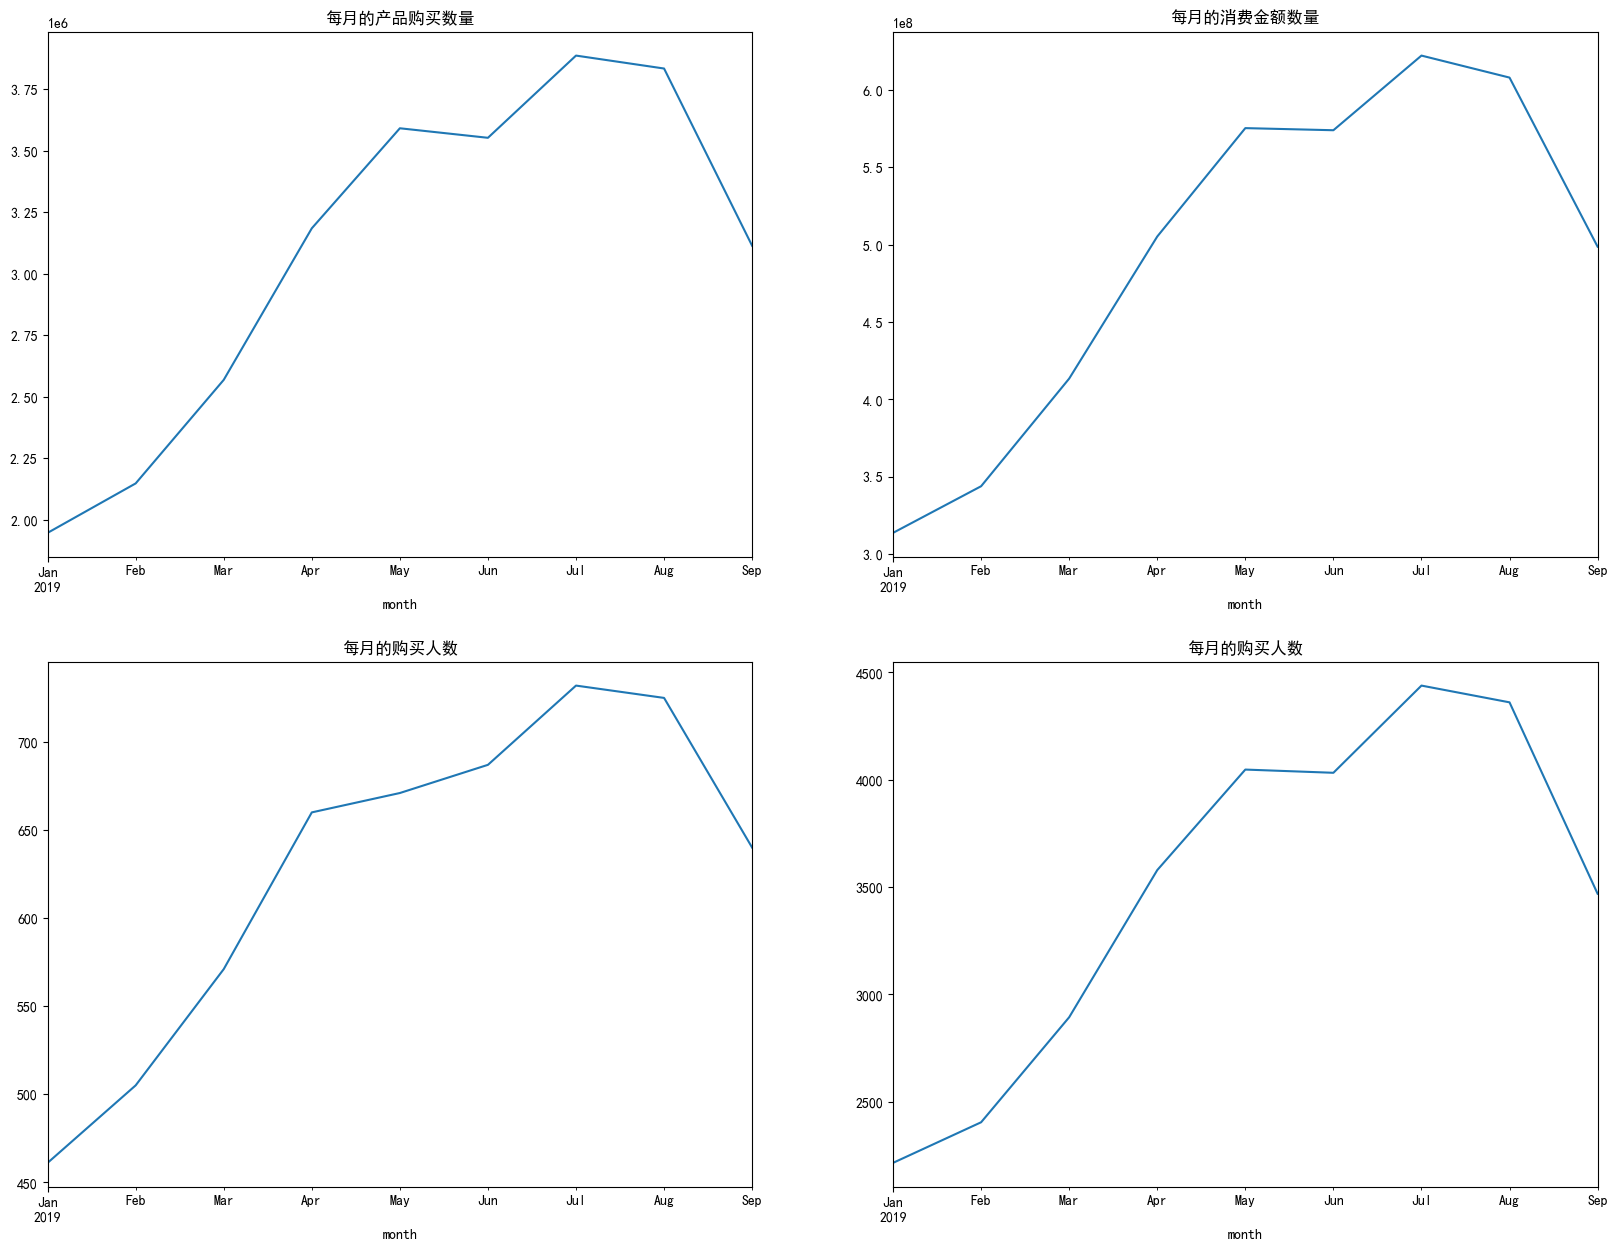

In [30]:
plt.figure(figsize=(20,15))
plt.subplot(221)
dfm.groupby('month')['订购数量'].sum().plot()
plt.title('每月的产品购买数量')
plt.subplot(222)
dfm.groupby('month')['金额'].sum().plot()
plt.title('每月的消费金额数量')
plt.subplot(223)
dfm.groupby('month')['客户编码'].apply(lambda x:len(x.drop_duplicates())).plot()
plt.title('每月的购买人数')
plt.subplot(224)
dfm.groupby('month')['客户编码'].count().plot()
plt.title('每月的购买人数')

In [31]:
time =['一月份','二月份','三月份','四月份','五月份','六月份','七月份','八月份','九月份']
nm = list(dfm.groupby('month')['订购数量'].sum().values)
my = list(dfm.groupby('month')['金额'].sum().values)
um = list(dfm.groupby('month')['客户编码'].apply(lambda x:len(x.drop_duplicates())).values)
bm = list(dfm.groupby('month')['客户编码'].count().values)

In [32]:
user_cumsum = dfm.groupby('客户编码')['金额'].sum().sort_values().reset_index()
user_cumsum['amount_cumsum'] = user_cumsum['金额'].cumsum()
amount_total = user_cumsum['amount_cumsum'].max() 
user_cumsum['prop'] = user_cumsum.apply(lambda x:x['amount_cumsum']/amount_total,axis=1)
user_cumsum = user_cumsum['prop'].values
#line5.render(r"C:\Users\lihuiting\Desktop\shangye.html")
#符合电商领域的“二八定律”

In [33]:
#b.用户价值分析（RFM模型)

In [34]:
dfm.head(20)

,订单编码,订单日期,客户编码,所在区域,所在省份,所在地市,商品编号,订购数量,订购单价,金额,商品名称,商品小类,商品大类,销售单价,month
0,D31313,2019-05-16,S22796,东区,浙江省,台州市,X091,892.0,214.0,190888.0,商品91,粉底,彩妆,214,2019-05-01
1,D26674,2019-05-01,S15128,东区,江苏省,南通市,X091,1133.0,214.0,242462.0,商品91,粉底,彩妆,214,2019-05-01
2,D23381,2019-09-22,S17133,东区,江苏省,宿迁市,X091,1136.0,214.0,243104.0,商品91,粉底,彩妆,214,2019-09-01
3,D29060,2019-09-10,S14106,东区,江苏省,常州市,X091,544.0,214.0,116416.0,商品91,粉底,彩妆,214,2019-09-01
4,D21234,2019-07-03,S17197,东区,湖北省,十堰市,X091,342.0,214.0,73188.0,商品91,粉底,彩妆,214,2019-07-01
5,D34023,2019-09-24,S23249,北区,山东省,烟台市,X091,1799.0,214.0,384986.0,商品91,粉底,彩妆,214,2019-09-01
6,D28625,2019-04-30,S10777,南区,福建省,龙岩市,X091,773.0,214.0,165422.0,商品91,粉底,彩妆,214,2019-04-01
7,D32414,2019-02-12,S13312,西区,四川省,南充市,X091,51.0,214.0,10914.0,商品91,粉底,彩妆,214,2019-02-01
8,D21425,2019-08-28,S18132,西区,云南省,西双版纳傣族自治州,X091,2105.0,214.0,450470.0,商品91,粉底,彩妆,214,2019-08-01
9,D31411,2019-05-16,S11581,东区,江苏省,南京市,X091,977.0,214.0,209078.0,商品91,粉底,彩妆,214,2019-05-01


In [35]:
#计算f值

In [36]:
ff = dfm.groupby('客户编码')['订单编码'].count()
ff

客户编码
S10001    38
S10011    31
S10016    18
S10025    41
S10057    38
          ..
S23256    55
S23299    25
S23312    55
S23313    42
S23337    10
Name: 订单编码, Length: 1083, dtype: int64

In [37]:
#计算r值

In [38]:
rrr = dfm.groupby('客户编码')['订单日期'].max()
maxday = dfm['订单日期'].max()
print(maxday)
rr = (maxday-rrr).dt.days
rr

2019-09-30 00:00:00


客户编码
S10001    15
S10011     2
S10016    91
S10025    10
S10057     0
          ..
S23256     3
S23299     2
S23312     9
S23313     9
S23337    21
Name: 订单日期, Length: 1083, dtype: int64

In [39]:
#计算m值

In [40]:
mm = dfm.groupby('客户编码')['金额'].sum()
mm

客户编码
S10001    5909783.0
S10011    3887062.0
S10016    2467894.0
S10025    6612251.0
S10057    4763104.0
            ...    
S23256    8292537.0
S23299    3732414.0
S23312    6530420.0
S23313    6219869.0
S23337    1468376.0
Name: 金额, Length: 1083, dtype: float64

In [41]:
#形成frm表

In [42]:
rfm = pd.concat([ff,rr,mm],axis=1)
rfm = rfm.rename(columns = {'订单编码':'F','订单日期':'R','金额':'M'})
rfm

,F,R,M
客户编码,,,
S10001,38,15,5909783.0
S10011,31,2,3887062.0
S10016,18,91,2467894.0
S10025,41,10,6612251.0
S10057,38,0,4763104.0
...,...,...,...
S23256,55,3,8292537.0
S23299,25,2,3732414.0
S23312,55,9,6530420.0


In [43]:
#开始分组 
rfm['R'] = pd.qcut(rfm['R'],q=5,labels=[1,2,3,4,5])
rfm['F'] = pd.qcut(rfm['F'],q=5,labels=[1,2,3,4,5])
rfm['M'] = pd.qcut(rfm['M'],q=5,labels=[1,2,3,4,5])

In [44]:
def change(x):
    if x>3:
        return '1'
    else:
        return '0'

In [45]:
def typef(x):
    if x == '111':
        return '重要价值客户'
    elif x == '011':
        return '重要保持客户'
    elif x == '101':
        return '重要发展客户'
    elif x == '001':
        return '重要挽留客户'
    elif x == '110':
        return '一般价值客户'
    elif x == '010':
        return '一般保持客户'
    elif x == '100':
        return '一般发展客户'
    else:
        return '一般挽留客户'

In [46]:
rrffmm = rfm.copy()
rrffmm['F'] = rrffmm['F'].apply(change)
rrffmm['M'] = rrffmm['M'].apply(change)
rrffmm['R'] = rrffmm['R'].apply(change)
rrffmm['RFM'] = rrffmm['R']+rrffmm['F']+rrffmm['M']
rrffmm['RFM'] = rrffmm['RFM'].apply(typef)
rrffmm

,F,R,M,RFM
客户编码,,,,
S10001,1,0,1,重要保持客户
S10011,0,0,0,一般挽留客户
S10016,0,1,0,一般发展客户
S10025,1,0,1,重要保持客户
S10057,1,0,1,重要保持客户
...,...,...,...,...
S23256,1,0,1,重要保持客户
S23299,0,0,0,一般挽留客户
S23312,1,0,1,重要保持客户


In [47]:
rrffmm[rrffmm['RFM'] == '一般保持客户']

,F,R,M,RFM
客户编码,,,,
S10915,1,0,0,一般保持客户
S11021,1,0,0,一般保持客户
S12455,1,0,0,一般保持客户
S16149,1,0,0,一般保持客户
S16856,1,0,0,一般保持客户
S18819,1,0,0,一般保持客户
S22753,1,0,0,一般保持客户


In [48]:
#可视化

In [49]:
pie = Pie()
da = rrffmm['RFM'].value_counts()
data = [(i, num) for i, num in zip(da.index, da.values)]
data

[('一般挽留客户', 318),
 ('一般发展客户', 314),
 ('重要保持客户', 306),
 ('重要价值客户', 87),
 ('重要挽留客户', 21),
 ('重要发展客户', 19),
 ('一般价值客户', 11),
 ('一般保持客户', 7)]

In [50]:
pie.add(series_name="",
        data_pair = data,
        label_opts=opts.LabelOpts(formatter="{d}%",position="inside"))
pie.set_global_opts(
    title_opts=opts.TitleOpts(title="不同类型价值客户占比图"),
)
#pie.render(r"C:\Users\lihuiting\Desktop\shangye.html")

In [51]:
#c.新老，活跃，回流用户分析

In [52]:
dd = dfm.pivot_table(columns = 'month',
                     index = '客户编码',
                     values = '订单编码',
                     aggfunc = 'count').fillna(0)
dd

month,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01
客户编码,,,,,,,,,
S10001,10.0,0.0,5.0,2.0,1.0,0.0,7.0,7.0,6.0
S10011,11.0,3.0,4.0,0.0,0.0,6.0,0.0,3.0,4.0
S10016,7.0,0.0,0.0,0.0,7.0,2.0,2.0,0.0,0.0
S10025,1.0,3.0,3.0,8.0,5.0,0.0,7.0,7.0,7.0
S10057,0.0,0.0,6.0,7.0,4.0,7.0,3.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...
S23256,0.0,0.0,4.0,16.0,5.0,14.0,1.0,11.0,4.0
S23299,0.0,3.0,0.0,0.0,3.0,10.0,3.0,0.0,6.0
S23312,0.0,11.0,10.0,4.0,6.0,2.0,11.0,2.0,9.0


In [53]:
def changenu(x):
    if x > 0:
        return 1
    else:
        return 0
dd = dd.map(changenu)
dd    #如果是1就是本月买了，是0就是没买

month,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01
客户编码,,,,,,,,,
S10001,1,0,1,1,1,0,1,1,1
S10011,1,1,1,0,0,1,0,1,1
S10016,1,0,0,0,1,1,1,0,0
S10025,1,1,1,1,1,0,1,1,1
S10057,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
S23256,0,0,1,1,1,1,1,1,1
S23299,0,1,0,0,1,1,1,0,1
S23312,0,1,1,1,1,1,1,1,1


In [54]:
#第一次买就是新用户；如果本月买了；
#前一个月也买了就是活跃用户；
#如果从来没买过就是未消费用户；
#如果之前买过，后来中断，但是后来又买了，就是回流用户；
#如果之前买过，后面没买，就是不活跃用户
def activeornot(x):
    sta = []
    for i in range(9):     #9个月
        if x.iloc[i] == 0:
            if len(sta) == 0:
                sta.append('notbuy')
            else:
                if sta[i-1] == 'notbuy':
                    sta.append('notbuy')
                else:
                    sta.append('unactive')
        elif x.iloc[i] == 1:
            if len(sta) == 0:
                sta.append('new')
            else:
                if sta[i-1] == 'unactive':
                    sta.append('return')
                elif sta[i-1] == 'notbuy':
                    sta.append('new')
                else:
                    sta.append('active')
    ss = pd.Series(sta,index = dd.columns)
    return ss

In [55]:
dd1 = dd.apply(activeornot,axis = 1)
dd1

month,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01
客户编码,,,,,,,,,
S10001,new,unactive,return,active,active,unactive,return,active,active
S10011,new,active,active,unactive,unactive,return,unactive,return,active
S10016,new,unactive,unactive,unactive,return,active,active,unactive,unactive
S10025,new,active,active,active,active,unactive,return,active,active
S10057,notbuy,notbuy,new,active,active,active,active,active,active
...,...,...,...,...,...,...,...,...,...
S23256,notbuy,notbuy,new,active,active,active,active,active,active
S23299,notbuy,new,unactive,unactive,return,active,active,unactive,return
S23312,notbuy,new,active,active,active,active,active,active,active


In [56]:
ddm = dd1.replace('notbuy',np.nan).apply(lambda x:x.value_counts())
ddm

month,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01
active,NaN,243.0,273,363,424,423,476,506,451.0
new,461.0,262.0,177,105,45,23,7,3,NaN
return,NaN,NaN,121,192,202,241,249,216,189.0
unactive,NaN,218.0,329,345,379,386,348,358,443.0


In [57]:
#d.logit回归

In [58]:
dd.head(10)

month,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01
客户编码,,,,,,,,,
S10001,1,0,1,1,1,0,1,1,1
S10011,1,1,1,0,0,1,0,1,1
S10016,1,0,0,0,1,1,1,0,0
S10025,1,1,1,1,1,0,1,1,1
S10057,0,0,1,1,1,1,1,1,1
S10058,0,0,1,1,1,0,1,0,1
S10098,1,0,0,0,0,1,1,0,0
S10106,0,1,0,0,1,0,0,0,1
S10110,1,1,0,1,0,0,1,1,0


In [59]:
d00 = dd[dd.columns.values[8]].apply(lambda x:1 if x > 0 else 0)
rrffmm['nrnb'] = d00
rrffmm

,F,R,M,RFM,nrnb
客户编码,,,,,
S10001,1,0,1,重要保持客户,1
S10011,0,0,0,一般挽留客户,1
S10016,0,1,0,一般发展客户,0
S10025,1,0,1,重要保持客户,1
S10057,1,0,1,重要保持客户,1
...,...,...,...,...,...
S23256,1,0,1,重要保持客户,1
S23299,0,0,0,一般挽留客户,1
S23312,1,0,1,重要保持客户,1


In [60]:
y = rrffmm['nrnb'].reset_index()
y = y.drop('客户编码',axis=1)
x = rrffmm.drop(['RFM','nrnb'],axis=1).reset_index()
x = x.drop('客户编码',axis=1)
x['F'] = x['F'].astype(int)
x['R'] = x['R'].astype(int)
x['M'] = x['M'].astype(int)
x = sm.add_constant(x)

# 拟合多元逻辑回归模型
logit_model = sm.MNLogit(y,x)
result = logit_model.fit()


         Current function value: 0.055051
         Iterations: 35


C:\Users\lihuiting\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
x_test = x
x_test = sm.add_constant(x_test)
predicted_value = result.predict(x_test)
predicted_value = predicted_value[1]
prr = predicted_value   #概率大于0.8，表明大概率会买。

In [62]:
rl = rrffmm['RFM'].reset_index()
dfo = pd.concat([prr, rl], axis=1)
dfoo = dfo[dfo[1] <0.5] 
dfon  = dfo[dfo[1] >= 0.5]
dfoo = dfoo.rename(columns={1:'购买概率'})
dfon = dfon.rename(columns={1:'购买概率'})
print(dfoo)
print(dfon)
yaxis = ['可能不买','可能买']

              购买概率    客户编码     RFM
2     4.319808e-12  S10016  一般发展客户
6     4.319808e-12  S10098  一般发展客户
8     4.319808e-12  S10110  一般发展客户
9     4.319808e-12  S10131  一般发展客户
10    5.930620e-12  S10135  重要价值客户
...            ...     ...     ...
1067  4.319808e-12  S23051  一般发展客户
1070  8.861440e-12  S23112  重要发展客户
1072  4.319808e-12  S23139  一般发展客户
1074  4.319808e-12  S23207  一般发展客户
1076  4.319808e-12  S23247  一般发展客户

[431 rows x 3 columns]
          购买概率    客户编码     RFM
0     0.984381  S10001  重要保持客户
1     0.978681  S10011  一般挽留客户
3     0.984381  S10025  重要保持客户
4     0.984381  S10057  重要保持客户
5     0.978681  S10058  一般挽留客户
...        ...     ...     ...
1078  0.984381  S23256  重要保持客户
1079  0.978681  S23299  一般挽留客户
1080  0.984381  S23312  重要保持客户
1081  0.984381  S23313  重要保持客户
1082  0.978681  S23337  一般挽留客户

[652 rows x 3 columns]


In [63]:
dfoo['购买概率'] = '可能不买'
dfon['购买概率'] = '可能买'
dp = pd.concat([dfoo,dfon])
rrffmmo = rrffmm.reset_index()
dpp = pd.merge(left=dp,right=rrffmmo,on='客户编码')
dpp    #得到下个月各个用户可能买或可能不买

,购买概率,客户编码,RFM_x,F,R,M,RFM_y,nrnb
0,可能不买,S10016,一般发展客户,0,1,0,一般发展客户,0
1,可能不买,S10098,一般发展客户,0,1,0,一般发展客户,0
2,可能不买,S10110,一般发展客户,0,1,0,一般发展客户,0
3,可能不买,S10131,一般发展客户,0,1,0,一般发展客户,0
4,可能不买,S10135,重要价值客户,1,1,1,重要价值客户,0
...,...,...,...,...,...,...,...,...
1078,可能买,S23256,重要保持客户,1,0,1,重要保持客户,1
1079,可能买,S23299,一般挽留客户,0,0,0,一般挽留客户,1
1080,可能买,S23312,重要保持客户,1,0,1,重要保持客户,1
1081,可能买,S23313,重要保持客户,1,0,1,重要保持客户,1


In [64]:
#定义营销策略函数
def strategy(x):
    if x['RFM_x'] == '重要价值客户':
        return '提供定制化的服务和专属权益'
    elif x['RFM_x'] == '重要保持客户':
        return '主动和他保持联系'
    elif x['RFM_x'] == '重要发展客户':
        return '重点发展,推出专属优惠'
    elif x['RFM_x'] == '重要挽留客户':
        return '给予挽留措施,比如商品积分活动'
    else:
        return '不用特地营销'
dpp['营销策略'] = dpp.apply(strategy, axis=1)
print(dpp)

      购买概率    客户编码   RFM_x  F  R  M   RFM_y  nrnb           营销策略
0     可能不买  S10016  一般发展客户  0  1  0  一般发展客户     0         不用特地营销
1     可能不买  S10098  一般发展客户  0  1  0  一般发展客户     0         不用特地营销
2     可能不买  S10110  一般发展客户  0  1  0  一般发展客户     0         不用特地营销
3     可能不买  S10131  一般发展客户  0  1  0  一般发展客户     0         不用特地营销
4     可能不买  S10135  重要价值客户  1  1  1  重要价值客户     0  提供定制化的服务和专属权益
...    ...     ...     ... .. .. ..     ...   ...            ...
1078   可能买  S23256  重要保持客户  1  0  1  重要保持客户     1       主动和他保持联系
1079   可能买  S23299  一般挽留客户  0  0  0  一般挽留客户     1         不用特地营销
1080   可能买  S23312  重要保持客户  1  0  1  重要保持客户     1       主动和他保持联系
1081   可能买  S23313  重要保持客户  1  0  1  重要保持客户     1       主动和他保持联系
1082   可能买  S23337  一般挽留客户  0  0  0  一般挽留客户     1         不用特地营销

[1083 rows x 9 columns]


In [65]:
data_dict = dict(zip(dpp['客户编码'], zip(dpp['RFM_x'], dpp['购买概率'],dpp['营销策略'])))
data_dict

{'S10016': ('一般发展客户', '可能不买', '不用特地营销'),
 'S10098': ('一般发展客户', '可能不买', '不用特地营销'),
 'S10110': ('一般发展客户', '可能不买', '不用特地营销'),
 'S10131': ('一般发展客户', '可能不买', '不用特地营销'),
 'S10135': ('重要价值客户', '可能不买', '提供定制化的服务和专属权益'),
 'S10136': ('重要价值客户', '可能不买', '提供定制化的服务和专属权益'),
 'S10143': ('一般发展客户', '可能不买', '不用特地营销'),
 'S10271': ('重要发展客户', '可能不买', '重点发展,推出专属优惠'),
 'S10438': ('一般发展客户', '可能不买', '不用特地营销'),
 'S10468': ('一般发展客户', '可能不买', '不用特地营销'),
 'S10510': ('一般发展客户', '可能不买', '不用特地营销'),
 'S10529': ('一般发展客户', '可能不买', '不用特地营销'),
 'S10550': ('一般发展客户', '可能不买', '不用特地营销'),
 'S10570': ('一般发展客户', '可能不买', '不用特地营销'),
 'S10575': ('一般发展客户', '可能不买', '不用特地营销'),
 'S10580': ('重要价值客户', '可能不买', '提供定制化的服务和专属权益'),
 'S10606': ('一般价值客户', '可能不买', '不用特地营销'),
 'S10607': ('重要价值客户', '可能不买', '提供定制化的服务和专属权益'),
 'S10616': ('重要价值客户', '可能不买', '提供定制化的服务和专属权益'),
 'S10648': ('一般发展客户', '可能不买', '不用特地营销'),
 'S10819': ('一般发展客户', '可能不买', '不用特地营销'),
 'S10905': ('一般发展客户', '可能不买', '不用特地营销'),
 'S10909': ('一般发展客户', '可能不买', '不用特地营销'),
 'S10972': ('重要发展

#### 地域角度

In [66]:
#a.销售热点区域（订单最多，金额最大，活跃度最高的区域）
#groupby地域,聚合金额（max),订单（count),活跃度

In [67]:
#订单最多
dfmax = dfm.groupby('所在省份')['商品小类'].count()
dfmax

所在省份
上海市         1276
云南省          801
内蒙古自治区       140
北京市          624
吉林省          380
四川省         1525
天津市          186
宁夏回族自治区      116
安徽省         1519
山东省         1424
山西省          575
广东省         3347
广西壮族自治区     1041
新疆维吾尔自治区     227
江苏省         4730
江西省         1077
河北省         1046
河南省          640
浙江省         2645
海南省          154
湖北省         1060
湖南省         1483
甘肃省          334
福建省         1759
贵州省          553
辽宁省          616
重庆市          894
陕西省          725
黑龙江省         543
Name: 商品小类, dtype: int64

In [68]:
#金额最高
dfmoney = dfm.groupby('所在省份')['金额'].sum()
dfmoney

所在省份
上海市         184133636.0
云南省         111096024.0
内蒙古自治区       20334988.0
北京市          89965528.0
吉林省          56104353.0
四川省         216173361.0
天津市          26070937.0
宁夏回族自治区      16016770.0
安徽省         215696158.0
山东省         200499073.0
山西省          84653266.0
广东省         475061967.0
广西壮族自治区     146405217.0
新疆维吾尔自治区     32009386.0
江苏省         669929260.0
江西省         147048929.0
河北省         151701279.0
河南省          87702441.0
浙江省         373748591.0
海南省          21409284.0
湖北省         145089769.0
湖南省         210903370.0
甘肃省          45718487.0
福建省         253020376.0
贵州省          75317930.0
辽宁省          94163328.0
重庆市         127259097.0
陕西省         102571496.0
黑龙江省         74037474.0
Name: 金额, dtype: float64

In [69]:
province = list(dfmax.index.values)
num = list(dfmax.values)
saledata = list((n,m) for n,m in zip(province,num))
saledata
province1 = list(dfmoney.index.values)
num1 = list(dfmoney.values)
saledata1 = list((n,m) for n,m in zip(province1,num1))

In [70]:
#化妆品偏好分析
dfs = pd.pivot_table(dfm,index="订单编码",columns = "商品小类",values = "订购数量").fillna(0).reset_index()
dff = dfm.groupby('订单编码')['所在区域'].apply(lambda x:x.unique())
dfss = pd.merge(left=dfs,right=dff,on="订单编码")
dfss['所在区域'] = dfss['所在区域'].astype(str).apply(lambda x:x[2:4])
dfss['所在区域'].value_counts()
dfss = dfss.drop('订单编码',axis=1)
dfss

,口红,洁面乳,爽肤水,眼影,眼霜,睫毛膏,粉底,蜜粉,防晒霜,隔离霜,面膜,面霜,所在区域
0,515.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1069.0,0.0,东区
1,0.0,0.0,810.0,0.0,1083.0,0.0,0.0,0.0,0.0,1280.0,607.0,0.0,西区
2,0.0,0.0,1082.0,0.0,266.0,0.0,0.0,0.0,1227.0,0.0,369.0,967.0,东区
3,0.0,839.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1456.0,720.0,0.0,南区
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,806.5,0.0,930.5,0.0,北区
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,367.0,0.0,0.0,南区
9058,872.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,北区
9059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1320.0,0.0,0.0,0.0,北区
9060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,499.0,0.0,0.0,南区


In [71]:
#是否存在显著差异

In [72]:
from scipy import stats

In [73]:
nanqu = dfss.query("所在区域 == '南区'")
beiqu = dfss.query("所在区域 == '北区'")
dongqu = dfss.query("所在区域 == '东区'")
xiqu = dfss.query("所在区域 == '西区'")
def fjianyan(x):
    f_statistic, p_value = stats.f_oneway(nanqu[x], beiqu[x], dongqu[x],xiqu[x])
    print("F-Statistic:", f_statistic)
    print("P-value:", p_value)
makeup = ['口红','洁面乳','爽肤水','眼影','眼霜','睫毛膏','粉底','蜜粉','防晒霜','隔离霜','面膜','面霜']
for i in makeup:
    print(i,end=':')
    fjianyan(i)
#不存在显著差异

口红:F-Statistic: 1.7432752234959936
P-value: 0.15580276780965874
洁面乳:F-Statistic: 1.951397188612013
P-value: 0.11900474985015488
爽肤水:F-Statistic: 0.5039040816872364
P-value: 0.6795796359564585
眼影:F-Statistic: 0.6729587278613038
P-value: 0.5685215930638707
眼霜:F-Statistic: 1.281730640563427
P-value: 0.27874220150927964
睫毛膏:F-Statistic: 0.5602242144558806
P-value: 0.6412533172568164
粉底:F-Statistic: 0.16846120812908857
P-value: 0.9177040317352915
蜜粉:F-Statistic: 0.18824917811992375
P-value: 0.9044499524564085
防晒霜:F-Statistic: 0.4648374738761726
P-value: 0.7068286768175482
隔离霜:F-Statistic: 1.2991966475250862
P-value: 0.27280695216623163
面膜:F-Statistic: 0.21786782633985535
P-value: 0.8840558036550439
面霜:F-Statistic: 0.7257093491742023
P-value: 0.5364955059701567


#### 商品角度

In [74]:
#a.畅销商品分析

In [75]:
dfhyo1 = dfm.groupby('商品小类')['客户编码'].count().sort_values()  #购买数量
dfhyo1

商品小类
蜜粉       52
眼影      342
睫毛膏     655
粉底     1386
洁面乳    2198
口红     2268
防晒霜    2707
隔离霜    2728
眼霜     3761
爽肤水    4026
面霜     5195
面膜     6122
Name: 客户编码, dtype: int64

In [76]:
dz = [(i, num) for i, num in zip(dfhyo1.index, dfhyo1.values)]
dz

[('蜜粉', 52),
 ('眼影', 342),
 ('睫毛膏', 655),
 ('粉底', 1386),
 ('洁面乳', 2198),
 ('口红', 2268),
 ('防晒霜', 2707),
 ('隔离霜', 2728),
 ('眼霜', 3761),
 ('爽肤水', 4026),
 ('面霜', 5195),
 ('面膜', 6122)]

In [77]:
#作化妆品销售量占比饼图
pie1 = Pie()
pie1.set_global_opts(datazoom_opts=opts.DataZoomOpts(is_show=True, type_="slider"))
pie1 = Pie(init_opts=opts.InitOpts(theme="light",width="400px",height="400px"))
pie1.add(series_name="",
        data_pair = dz,
        radius=["40%","50%"],
        label_opts=opts.LabelOpts(formatter="{d}%",position="outside"))


In [78]:
#b.商品组合优化分析

In [79]:
makeup = dfm.groupby('订单编码')['商品小类'].value_counts().unstack().fillna(0)
makeup   #找到每个订单购买的商品品类，没买的就是NAN

商品小类,口红,洁面乳,爽肤水,眼影,眼霜,睫毛膏,粉底,蜜粉,防晒霜,隔离霜,面膜,面霜
订单编码,,,,,,,,,,,,
D21074,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
D21075,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
D21076,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
D21077,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
D21078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
D34418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
D34419,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D34420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [80]:
makeuplist = list(makeup.columns.values)
makeuplist  #找到品类

['口红', '洁面乳', '爽肤水', '眼影', '眼霜', '睫毛膏', '粉底', '蜜粉', '防晒霜', '隔离霜', '面膜', '面霜']

In [81]:
bigli = []
for i in makeup.index:
    smli = []
    for j in makeuplist:
        num = makeup.loc[i,j]
        if num > 0:
            smli.append(j)
    bigli.append(smli)


In [82]:
sougou = {}
for i in bigli:
    if len(i)>=2:
        sougou[tuple(i)] = sougou.get(tuple(i),0)+1
sougouli = list(sougou.items())
sougouli.sort(key = lambda x:x[1],reverse = True)
sougouli 
zuhe = []
num1 = []
for j in range(10):
    zuhe.append(sougouli[j][0])
    num1.append(sougouli[j][1])
print(zuhe)
print(num1)     #画最受欢迎的商品组合前10名图

[('面膜', '面霜'), ('爽肤水', '面膜'), ('眼霜', '面膜'), ('爽肤水', '面膜', '面霜'), ('眼霜', '面膜', '面霜'), ('爽肤水', '面霜'), ('眼霜', '面霜'), ('爽肤水', '眼霜', '面膜'), ('防晒霜', '面膜'), ('隔离霜', '面膜')]
[226, 178, 169, 141, 131, 131, 121, 105, 98, 98]


In [83]:
rules = apriori(bigli)
extract_result = []
for rule in rules:
    support = round(rule.support,3)
    for i in rule.ordered_statistics:
        head_set = list(i.items_base)
        tail_set = list(i.items_add)
        if head_set == []:
            continue
        related_category = str(head_set)+'-'+str(tail_set)
        confidence = round(i.confidence,3)
        lift = round(i.lift,3)
        extract_result.append([related_category,support,confidence,lift])
rule_data = pd.DataFrame(extract_result,columns=['关联规则','支持度','置信度','提升度'])
print(rule_data)

              关联规则    支持度    置信度    提升度
0    ['口红']-['面膜']  0.107  0.477  0.948
1    ['面膜']-['口红']  0.107  0.213  0.948
2   ['洁面乳']-['面膜']  0.105  0.474  0.943
3   ['面膜']-['洁面乳']  0.105  0.209  0.943
4   ['爽肤水']-['眼霜']  0.121  0.334  0.953
5   ['眼霜']-['爽肤水']  0.121  0.346  0.953
6   ['爽肤水']-['面膜']  0.181  0.498  0.990
7   ['面膜']-['爽肤水']  0.181  0.360  0.990
8   ['爽肤水']-['面霜']  0.158  0.435  0.981
9   ['面霜']-['爽肤水']  0.158  0.356  0.981
10   ['眼霜']-['面膜']  0.172  0.491  0.976
11   ['面膜']-['眼霜']  0.172  0.342  0.976
12   ['眼霜']-['面霜']  0.151  0.430  0.968
13   ['面霜']-['眼霜']  0.151  0.339  0.968
14  ['防晒霜']-['面膜']  0.130  0.494  0.982
15  ['面膜']-['防晒霜']  0.130  0.259  0.982
16  ['防晒霜']-['面霜']  0.118  0.449  1.011
17  ['面霜']-['防晒霜']  0.118  0.267  1.011
18  ['隔离霜']-['面膜']  0.128  0.481  0.957
19  ['面膜']-['隔离霜']  0.128  0.255  0.957
20  ['隔离霜']-['面霜']  0.114  0.428  0.964
21  ['面霜']-['隔离霜']  0.114  0.257  0.964
22   ['面膜']-['面霜']  0.218  0.434  0.978
23   ['面霜']-['面膜']  0.218  0.492  0.978


In [84]:
for i in ['[',']']:
    rule_data['关联规则'] = rule_data['关联规则'].str.replace(i,'')
rule_data['关联规则']

0      '口红'-'面膜'
1      '面膜'-'口红'
2     '洁面乳'-'面膜'
3     '面膜'-'洁面乳'
4     '爽肤水'-'眼霜'
5     '眼霜'-'爽肤水'
6     '爽肤水'-'面膜'
7     '面膜'-'爽肤水'
8     '爽肤水'-'面霜'
9     '面霜'-'爽肤水'
10     '眼霜'-'面膜'
11     '面膜'-'眼霜'
12     '眼霜'-'面霜'
13     '面霜'-'眼霜'
14    '防晒霜'-'面膜'
15    '面膜'-'防晒霜'
16    '防晒霜'-'面霜'
17    '面霜'-'防晒霜'
18    '隔离霜'-'面膜'
19    '面膜'-'隔离霜'
20    '隔离霜'-'面霜'
21    '面霜'-'隔离霜'
22     '面膜'-'面霜'
23     '面霜'-'面膜'
Name: 关联规则, dtype: object

In [85]:
ruledict = dict(zip(rule_data['关联规则'],zip(rule_data['支持度'],rule_data['置信度'],rule_data['提升度'])))
ruledict

{"'口红'-'面膜'": (0.107, 0.477, 0.948),
 "'面膜'-'口红'": (0.107, 0.213, 0.948),
 "'洁面乳'-'面膜'": (0.105, 0.474, 0.943),
 "'面膜'-'洁面乳'": (0.105, 0.209, 0.943),
 "'爽肤水'-'眼霜'": (0.121, 0.334, 0.953),
 "'眼霜'-'爽肤水'": (0.121, 0.346, 0.953),
 "'爽肤水'-'面膜'": (0.181, 0.498, 0.99),
 "'面膜'-'爽肤水'": (0.181, 0.36, 0.99),
 "'爽肤水'-'面霜'": (0.158, 0.435, 0.981),
 "'面霜'-'爽肤水'": (0.158, 0.356, 0.981),
 "'眼霜'-'面膜'": (0.172, 0.491, 0.976),
 "'面膜'-'眼霜'": (0.172, 0.342, 0.976),
 "'眼霜'-'面霜'": (0.151, 0.43, 0.968),
 "'面霜'-'眼霜'": (0.151, 0.339, 0.968),
 "'防晒霜'-'面膜'": (0.13, 0.494, 0.982),
 "'面膜'-'防晒霜'": (0.13, 0.259, 0.982),
 "'防晒霜'-'面霜'": (0.118, 0.449, 1.011),
 "'面霜'-'防晒霜'": (0.118, 0.267, 1.011),
 "'隔离霜'-'面膜'": (0.128, 0.481, 0.957),
 "'面膜'-'隔离霜'": (0.128, 0.255, 0.957),
 "'隔离霜'-'面霜'": (0.114, 0.428, 0.964),
 "'面霜'-'隔离霜'": (0.114, 0.257, 0.964),
 "'面膜'-'面霜'": (0.218, 0.434, 0.978),
 "'面霜'-'面膜'": (0.218, 0.492, 0.978)}

In [86]:
promoted = rule_data[rule_data['提升度']>1]
promoted  #说明防晒霜和面霜相互促进，所以推荐把这两件作成套装出售

,关联规则,支持度,置信度,提升度
16,'防晒霜'-'面霜',0.118,0.449,1.011
17,'面霜'-'防晒霜',0.118,0.267,1.011


In [87]:
#可视化
ruru = list(promoted['关联规则'].values)
ooki=[]
ooki.append(list(promoted['支持度'].values))
ooki.append(list(promoted['置信度'].values))
ooki.append(list(promoted['提升度'].values))
print(ruru)
print(ooki)

["'防晒霜'-'面霜'", "'面霜'-'防晒霜'"]
[[0.118, 0.118], [0.449, 0.267], [1.011, 1.011]]


In [88]:
bar10 = Bar()
bar10.add_xaxis(xaxis_data = ruru)
for i in range(3):
    bar10.add_yaxis(series_name="",
                  y_axis=ooki[i],
                  label_opts=opts.LabelOpts(font_size=10))
page3 = Page(layout = Page.SimplePageLayout)
